<a href="https://colab.research.google.com/github/ijjuManjula-11/CODSOFT/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [14]:
def read_image():
  img=cv2.imread('bird1.webp')
  #convert the image BGR to RGB
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  #scaling the image
  img=img/255.0
  return img

In [15]:
def inti_means(img,clusters):
  #converting it into 2d array
  points=img.reshape((-1,img.shape[2]))
  m,n=points.shape
  means=np.zeros((clusters,n))
  for i in range(clusters):
    rand_indices=np.random.choice(m,size=10,replace=False)
    means[i]=np.mean(points[rand_indices],axis=0)
    return points,means

In [22]:
def distance(x1,y1,x2,y2):
  dist=np.square(x1-x2)+np.square(y1-y2)
  dist=np.sqrt(dist)
  return dist


In [23]:
def k_means(points, means, clusters):
	iterations = 10 # the number of iterations
	m, n = points.shape

	# these are the index values that correspond to the cluster to
	# which each pixel belongs to.
	index = np.zeros(m)

	# k-means algorithm.
	while iterations > 0:
		for j in range(m):
			# initialize minimum value to a large value
			min_dist = float('inf')
			temp = None

			for k in range(clusters):
				x1, y1 = points[j, 0], points[j, 1]
				x2, y2 = means[k, 0], means[k, 1]

				if distance(x1, y1, x2, y2) <= min_dist:
					min_dist = distance(x1, y1, x2, y2)
					temp = k
					index[j] = k

		for k in range(clusters):
			cluster_points = points[index == k]
			if len(cluster_points) > 0:
				means[k] = np.mean(cluster_points, axis=0)

		iterations -= 1

	return means, index


In [24]:
def compress_image(means, index, img):
	# recovering the compressed image by assigning each pixel to its corresponding centroid.
	centroid = np.array(means)
	recovered = centroid[index.astype(int), :]

	# getting back the 3d matrix (row, col, rgb(3))
	recovered = recovered.reshape(img.shape)

	# plotting the compressed image.
	plt.imshow(recovered)
	plt.show()

	# saving the compressed image.
	cv2.imwrite('compressed_' + str(clusters) + '_colors.png',recovered)


Enter the number of colors in the compressed image (default = 16): 2


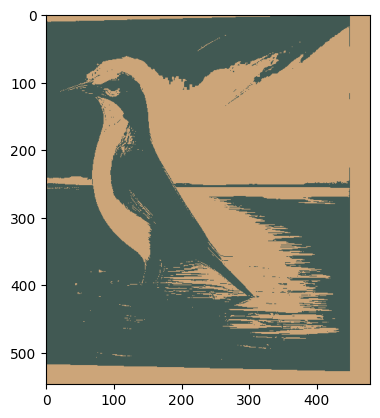

In [26]:
# Driver Code
if __name__ == '__main__':
	img = read_image()

	clusters = 16
	clusters = int(input('Enter the number of colors in the compressed image (default = 16): '))

	points, means = inti_means(img,clusters)
	means, index = k_means(points, means, clusters)
	compress_image(means, index, img)
